# Exercise 1a

Group Members: Luis Pazos Clemens, Robert Freund, Eugen Dizer

Deadline: 20.11.2020, 16:00.

In [1]:
#Load standard libraries
import numpy as np   
import matplotlib.pyplot as plt   
%matplotlib inline

# 1 Monte-Carlo Simulation

In the lecture, we considered the following toy problem: The feature variable $X \in [0, 1]$ is real-valued
and 1-dimensional, and the response $Y \in \{0, 1\}$ is discrete with two classes. The prior probabilities
and likelihoods are given by
\begin{align*}
p(Y = 0) = p(Y &= 1) = \frac{1}{2} \,, \\
p(X = x \vert Y = 0) &= 2 − 2x \,, \\
p(X = x \vert Y = 1) &= 2x \,.
\end{align*}

We also derived theoretical error rates of the Bayes and nearest neighbor classifiers for this problem. Monte Carlo simulation is a powerful method to verify the correctness of theoretical results
experimentally.

## 1.1 Data Creation and Visualization (7 points)

Since the given model is generative, one can create data using a random number generator. Specifically, one first samples an instance label $Y$ according to the prior probabilities, and then uses the
corresponding likelihood to sample the feature $X$. If no predefined random generator for the desired
likelihood is available (as is the case here), uniformly distributed samples from a standard random
number generator can be transformed to the desired distribution by means of "inverse transform
sampling" (see https://en.wikipedia.org/wiki/Inverse_transform_sampling).

Work out the required transformation formulas for our likelihoods and show your derivation in a
Markdown cell. Then implement a function that returns the $X$-values and corresponding $Y$-labels for $N$ data instances. Use the module
numpy.random to generate random numbers. Check that the data have the correct distribution
with matplotlib (see https://matplotlib.org/gallery/statistics/hist.html for a demo).

### Derivation:

We have the given likelihoods: $p(X=x \vert Y=0) = 2 - 2x$ and $p(X=x \vert Y=1) = 2x$. 

From these we can construct the cumulative distribution functions by integration:
\begin{align*}
F_x(Y = 0) &= 2x - x^2 \,, \\ 
F_x(Y = 1) &= x^2 \,.
\end{align*}

Inverting those functions, one gets the distribution for $X$:
\begin{align*}
X(Y = 0) &= F^{-1}_x(Y = 0) = 1 - \sqrt{1-u} \,, \\ 
X(Y = 1) &= F^{-1}_x(Y = 1) = \sqrt{u} \,,
\end{align*}
where $u \in [0,1]$ is a random variable. 

In [2]:
def create_data(N):
    # Create N uniformly distributed random numbers
    U = np.random.rand(N)
    
    # Get the X variables with the respective distribution
    X0 = 1 - np.sqrt(1-U)
    X1 = np.sqrt(U)
    
    # Create N random numbers 0 or 1 with probability 0.5
    Y = np.random.rand(N)
    Y[Y < 0.5] = 0
    Y[Y >= 0.5] = 1
    
    # Pick a random X0 when Y=0
    # Pick a random X1 when Y=1
    X = X0
    X[Y == 1] = X1[Y == 1]

    return [X, Y]

The distribution can be visualized with histograms:

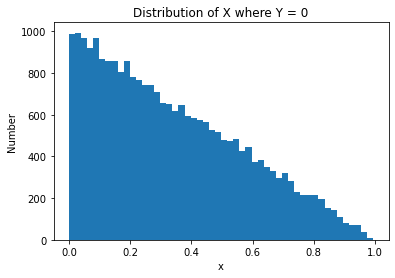

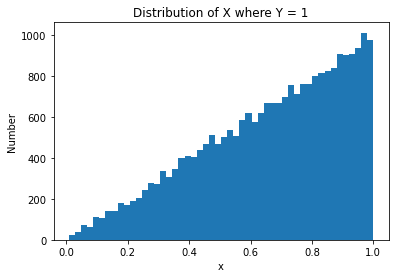

In [3]:
N = 50000

data = create_data(N)

# X values where Y = 0
X0 = data[0][data[1] == 0]

# X values where Y = 1
X1 = data[0][data[1] == 1]

plt.title("Distribution of X where Y = 0")
plt.hist(X0, bins=50)
plt.ylabel('Number')
plt.xlabel('x')
plt.show()

plt.title("Distribution of X where Y = 1")
plt.hist(X1, bins=50)
plt.ylabel('Number')
plt.xlabel('x')
plt.show()

## 1.2 Classification by Thresholding

In the lecture, we defined a classification rule deciding according to a threshold $x_t \in [0, 1]$:

- Rule A  (threshold classifier): $Y = f_A(X;x_t) = 0$ if $X < x_t$ and $Y = f_A(X;x_t) = 1$ if $X \geq x_t$
- Rule B  (threshold anti-classifier): $Y = f_B(X;x_t) = 1$ if $X < x_t$ and $Y = f_B(X;x_t) = 0$ if $X \geq x_t$

The corresponding error rates are:
\begin{align*}
p(\text{error}|A; x_t) &= \frac{1}{4} + \left(x_t - \frac{1}{2}\right)^2 \\
p(\text{error}|B; x_t) &= \frac{3}{4} - \left(x_t - \frac{1}{2}\right)^2 = 1 - p(\text{error}|A; x_t)
\end{align*}

Confirm experimentally for $x_t \in \{0.2, 0.5, 0.6\}$ that the predicted error rates are correct: Verify
that the minimum overall error of 25% is achieved when the threshold $x_t = 0.5$ (optimal Bayes
classifier). Repeat each test with 10 different test datasets of the same size $M$ and compute mean
and standard deviation of the error. Use test set sizes $M \in \{10, 100, 1000, 10000\}$. How does the
error standard deviation decrease with increasing $M$?

In [4]:
#Define Threshold classifier A
def thresh_class_A(x,t):
    y=1
    if x<t:
        y=0
    return y

#Define Thresshold Classifier B
def thresh_class_B(x,t):
    y=1
    if x >= t:
        y=0
    return y

#Calculate Error of A and B for different thresholds and same Data set
def calc_error(data_set,thresh):
    #Empty arrays to append results
    error_res = np.array([[],[]])
    
    #Run over different thresholds
    for t in thresh:
        error = np.array([[0],[0]])
        
        #Run over all points of the dataset
        for i in range(len(data_set[0])):
            #Check wether classifier A gives wrong result and count errors
            if thresh_class_A(data_set[0][i],t) != data_set[1][i]:
                error[0][0] += 1
            #Same for classifier B
            if thresh_class_B(data_set[0][i],t) != data_set[1][i]:
                error[1][0] += 1
        
        #Append data
        error_res = np.append(error_res,error,axis=1)
    
    #Calculate probability and return data
    return error_res/len(data_set[0])

In [5]:
#Analytic errorfunction of classifier A for different thresholds
def calc_error_analytic_A(thresh):
    error_ana = np.array([])
    for t in thresh:
        error_ana = np.append(error_ana,0.25+(t-0.5)**2)
    return error_ana

#Same for classifier B
def calc_error_analytic_B(thresh):
    error_ana = np.array([])
    for t in thresh:
        error_ana = np.append(error_ana,0.75-(t-0.5)**2)
    return error_ana

In [6]:
#Define threshold
thresh = [0.2,0.5,0.6]

#Define size of dataset
M = [10,100,1000,10000]

#Arrays to store result
error_res_A = np.zeros((len(M),len(thresh),10))
error_res_B = np.zeros((len(M),len(thresh),10))

#Run over all dataset sizes
for i in range(len(M)):
    error_res10_A = np.zeros((10,len(thresh)))
    error_res10_B = np.zeros((10,len(thresh)))
    
    #Run over all thresholds
    for j in range(10):
        #Calculate corresponding error probability
        error_res10_A[j]=calc_error(create_data(M[i]),thresh)[0]
        error_res10_B[j]=calc_error(create_data(M[i]),thresh)[1]
    
    #Write in an array
    error_res_A[i] = error_res10_A.T
    error_res_B[i] = error_res10_B.T

In [7]:
#Calculate Mean value and standard deviation

mean_std_A = np.zeros((len(M),len(thresh),2))
mean_std_B = np.zeros((len(M),len(thresh),2))

#Run overall dataset sizes
for i in range(len(M)):
    #Run over all threshholds
    for j in range(len(thresh)):
        #Calculate mean and standard deviation
        mean_std_A[i,j] = np.array([np.mean(error_res_A[i,j]),np.std(error_res_A[i,j])])*100
        mean_std_B[i,j] = np.array([np.mean(error_res_B[i,j]),np.std(error_res_B[i,j])])*100

So far we calculated the error probability of 4 different dataset sizes (10,100,1000,10000) for three different thresholds (0.2,0.5,0.6). We stored the corresponing mean value and standard deviation for 10 different datasets. In the following two graphs we plot the mean value with its standard deviation as errorbar against the size of the dataset.

We see espacially for larger datasets (M>100) that the red classifier with threshold $x_t=0.5$ has the lowest error probability. It converges to $p=25 \%$.

Also the other thresholds $x_t=0.6$ and $x_t=0.2$ converge to its corresponding analytical value $p=34 \%$ and $p=26 \%$.

Analytical probability error for x_t = [0.2,0.5,0.6]: [0.34 0.25 0.26]


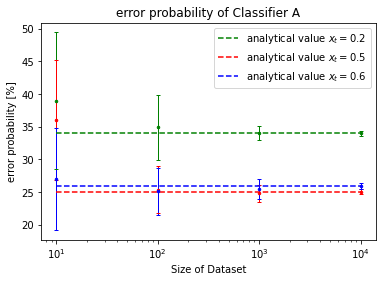

In [8]:
print("Analytical probability error for x_t = [0.2,0.5,0.6]:",calc_error_analytic_A(thresh))

#Plot the Error probability of different threshold parameters against the dataset size
plt.errorbar(M,mean_std_A[:,0,0],yerr=mean_std_A[:,0,1],fmt=".",color="g",elinewidth=1, capsize=2, capthick=1, markersize=5)
plt.errorbar(M,mean_std_A[:,1,0],yerr=mean_std_A[:,1,1],fmt=".",color="r",elinewidth=1, capsize=2, capthick=1, markersize=5)
plt.errorbar(M,mean_std_A[:,2,0],yerr=mean_std_A[:,2,1],fmt=".",color="b",elinewidth=1, capsize=2, capthick=1, markersize=5)

#Analytical result
plt.plot([10,10000],[34,34],"--",color="g", label="analytical value $x_t = 0.2$")
plt.plot([10,10000],[25,25],"--",color="r", label="analytical value $x_t = 0.5$")
plt.plot([10,10000],[26,26],"--",color="b", label="analytical value $x_t = 0.6$")

plt.xscale("log")
plt.ylabel("error probability [%]")
plt.xlabel("Size of Dataset")
plt.title("error probability of Classifier A")
plt.legend()
plt.show()

Also for Classifier B the three thresholds converge to its analytical value.

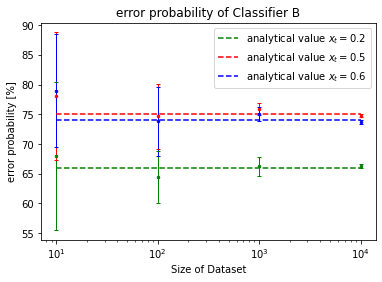

In [9]:
plt.errorbar(M,mean_std_B[:,0,0],yerr=mean_std_B[:,0,1],fmt=".",color="g",elinewidth=1, capsize=2, capthick=1, markersize=5)
plt.errorbar(M,mean_std_B[:,1,0],yerr=mean_std_B[:,1,1],fmt=".",color="r",elinewidth=1, capsize=2, capthick=1, markersize=5)
plt.errorbar(M,mean_std_B[:,2,0],yerr=mean_std_B[:,2,1],fmt=".",color="b",elinewidth=1, capsize=2, capthick=1, markersize=5)
plt.plot([10,10000],[66,66],"--",color="g", label="analytical value $x_t = 0.2$")
plt.plot([10,10000],[75,75],"--",color="r", label="analytical value $x_t = 0.5$")
plt.plot([10,10000],[74,74],"--",color="b", label="analytical value $x_t = 0.6$")
plt.xscale("log")
plt.ylabel("error probability [%]")
plt.xlabel("Size of Dataset")
plt.title("error probability of Classifier B")
plt.legend()
plt.show()

The standard deviation decreases with the Dataset size exponentially because we ccould easily fit an exponential decay through the received data.

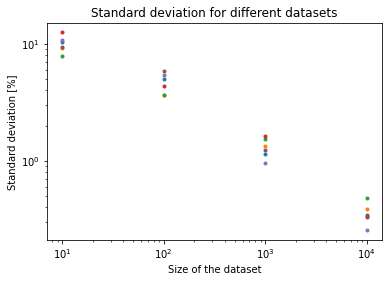

In [10]:
#Plot the standard deviation for different sizes of the dataset

plt.plot(M,mean_std_A[:,0,1],".")
plt.plot(M,mean_std_A[:,1,1],".")
plt.plot(M,mean_std_A[:,2,1],".")
plt.plot(M,mean_std_B[:,0,1],".")
plt.plot(M,mean_std_B[:,1,1],".")
plt.plot(M,mean_std_B[:,2,1],".")
plt.yscale("log")
plt.xscale("log")
plt.title("Standard deviation for different datasets")
plt.xlabel("Size of the dataset")
plt.ylabel("Standard deviation [%]")
plt.show()

## 1.3  Baseline Classifiers

We now compare the above results to two rules that entirely ignore the features:

- Rule C (guessing): $Y = f_C(X) = 0,1$ with probability 1/2
- Rule D (constant): $Y = f_D(X) = 1$ (it always predicts class 1)

Both result in an error rate of 1/2. Confirm this like in the previous exercise: Plot the error and its
standard deviation as a function of test set sizes $M \in \{10, 100, 1000, 10000\}$ for both new rules.

In [11]:
#Define Classifier C
def class_C(x):
    y = np.random.rand(len(x))
    y[y < 0.5] = 0
    y[y >= 0.5] = 1
    
    return y

#Define Classifier D
def class_D(x):
    return np.ones(len(x))

#Calculate Error for a given data set and classifier
def error_rate(data_set, classifier):
    #Scan where the y doesn't coincide
    error_array = abs(data_set[1] - classifier(data_set[0]))
    errors = np.count_nonzero(error_array == 1)
    return errors / len(data_set[1])

#Calculate the Mean and Standard Deviation for N different data sets with length M
def error_mean_std(N, M, classifier):
    errors = []
    for i in range(N):
        errors.append(error_rate(create_data(M), classifier))
    errors = np.array([errors])
    return [np.mean(errors), np.std(errors)]

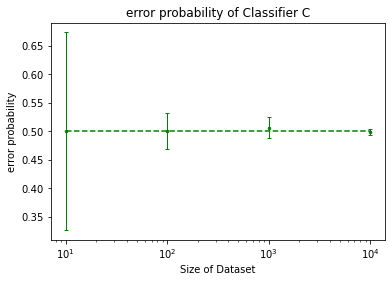

In [12]:
N = 10
M = [10,100,1000,10000]

MeansC = []
DeviationsC = []

for i in M:
    MeansC.append(error_mean_std(N, i, class_C)[0])
    DeviationsC.append(error_mean_std(N, i, class_C)[1])

plt.errorbar(M,MeansC,yerr=DeviationsC,fmt=".",color="g",elinewidth=1, capsize=2, capthick=1, markersize=5)
plt.plot([10,10000],[0.5,0.5],"--",color="g")
plt.xscale("log")
plt.ylabel("error probability")
plt.xlabel("Size of Dataset")
plt.title("error probability of Classifier C")
plt.show()

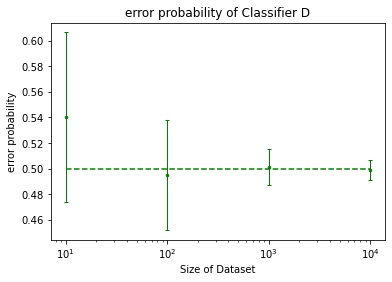

In [13]:
MeansD = []
DeviationsD = []

for i in M:
    MeansD.append(error_mean_std(N, i, class_D)[0])
    DeviationsD.append(error_mean_std(N, i, class_D)[1])

plt.errorbar(M,MeansD,yerr=DeviationsD,fmt=".",color="g",elinewidth=1, capsize=2, capthick=1, markersize=5)
plt.plot([10,10000],[0.5,0.5],"--",color="g")
plt.xscale("log")
plt.ylabel("error probability")
plt.xlabel("Size of Dataset")
plt.title("error probability of Classifier D")
plt.show()

One can see that the Standard Deviation decreases with higher $N$!

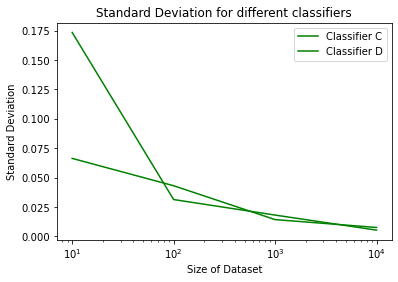

In [14]:
plt.plot(M,DeviationsC,"-",color="g",label="Classifier C")
plt.plot(M,DeviationsD,"-",color="g",label="Classifier D")
plt.xscale("log")
plt.ylabel("Standard Deviation")
plt.xlabel("Size of Dataset")
plt.title("Standard Deviation for different classifiers")
plt.legend()
plt.show()

## 1.4 Nearest Neighbor Classification

Implement the nearest neighbour classifier for our toy problem. Make sure that it can handle training
sets of arbitrary sizes.

Sample a training set of size $N = 2$. Make sure it contains one instance of either class, so your
create_data from the first exercise will not work out of the box. Determine the error rate of the
nearest neighbour classifier on a suficiently large test set. Repeat this with 100 different training
sets (all of size $N = 2$) and compute the average error on the same test set. Verify that this average
error is around 35%.

Repeat the experiment with training sets of size $N = 100$ and report the average error.

In [15]:
def create_data2(N):  #modified create_data 
    
    # Create N uniformly distributed random numbers
    U = np.random.rand(N)
    
    # Get the X variables with the respective distribution
    X0 = 1 - np.sqrt(1-U)
    X1 = np.sqrt(U)
    
    # Create N random numbers 0 or 1 with probability 0.5
    if N>1:
        Y = [0,1]   #makes sure that there is at least one instace of each class
        Y = np.append(Y,np.random.rand(N-2))
    else:
        Y = np.random.rand(N) #in case N=0,1
    Y[Y < 0.5] = 0
    Y[Y >= 0.5] = 1
    
    # Pick a random X0 when Y=0
    # Pick a random X1 when Y=1
    X = X0
    X[Y == 1] = X1[Y == 1]

    return [X, Y]

In [16]:
def NNclassifier(trainS,testS):

    Ylabels = np.empty(np.size(testS[1]))

    for i in range(np.size(testS[0])):                    #features from test set 
    
        dist = np.square(trainS[0]-testS[0][i])         #distance function is a simplified 1D Eucldiean distance
        min_dist_i = np.argmin(dist)                   #get index of smallest distance
        Ylabels[i] = trainS[1][min_dist_i]             #corresponding Y label
    
    return [testS[0], Ylabels]               #test set features with corresponding predicted Y labels

#Determining the error empirically
testS = create_data2(10000)
trainS = create_data2(10)

NNresult = NNclassifier(trainS,testS)

def NNerror(NNresult,testSY):             
    
    num_wrong_labels = np.sum(np.square(np.subtract(NNresult[1],testSY)))  
    error = num_wrong_labels/np.size(NNresult[1])
    
    return error

#Find average error

errors = np.empty(100)

def avg_error(it,D,N):   # iterations, D test features, N training instances
    
    for i in range(it):
        testS = create_data2(D)
        trainS = create_data2(N)
        errors[i] = NNerror(NNclassifier(trainS,testS),testS[1])

    return np.mean(errors)

# 100 iterations, 10000 test fetures, 2 training instances:
print(avg_error(100,10000,2))

# 100 iterations, 10000 test fetures, 100 training instances:
print(avg_error(100,10000,100))

0.359196
0.335646
